**Question**: How  does the solution space relate to the number of baselines and to spacing of antenas.  
**Note**: We do not consider the solution path here as we do not implement LMA  

**Objectives**  
Vary #Baselines and Spacing  
Measure the with of global valley  
Graph it w.r.t #Baselines  
Graph it w.r.t Baseline spacing  
Write a report 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import ProjectPacks as pp
import ProjectFuncs as pf

%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)  #spreads out plot surface for better visualization

from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

from IPython.display import HTML
HTML('../style/code_toggle.html')

In [2]:
## temporary file we write different array configurations out to. 
fout='temp_arr.txt'
 
def create_arrayfile(arr=[70,80,100,130,170,220,300],freq=1.4e9):
    with open(fout,'w') as f:
        f.write("{} {} \n".format("Num_Array: ",len(arr)))
        atxt=''
        for i,a in enumerate(arr): 
            atxt=atxt+' '+str(a)
            if i<len(arr)-1: atxt=atxt+','
        print(atxt)
        f.write("{} {} \n".format("Centre_Dist: ",atxt ) )
        f.write("{} {} \n".format("Centre_Freq: ",freq))


In [4]:
def get_res():

    rr_constA= np.empty((timeslots,timeslots))
    #rr_constM= np.empty((timeslots,timeslots))
    #rr_constL= np.empty((timeslots,timeslots))

    for a in range(timeslots):
        for b in range(timeslots):

            x_r= [L[a],M[b],x_true[2]]
            rr_constA[a,b]= np.square(np.linalg.norm(pf.modfunc_res(x_r,ut,vt,d)))/(int(len(ut)*(len(ut)-1)/2))

            #x_r= [L[a],x_true[1],A[b]]
            #rr_constM[a,b]= np.square(np.linalg.norm(pf.modfunc_res(x_r,ut,vt,d)))/(int(len(ut)*(len(ut)-1)/2))

            #x_r= [x_true[0],M[a],A[b]]
            #rr_constL[a,b]= np.square(np.linalg.norm(pf.modfunc_res(x_r,ut,vt,d)))/(int(len(ut)*(len(ut)-1)/2))

    Minimum_A= np.unravel_index(np.argmin(rr_constA),rr_constA.shape)
    print("Minimum of (L,M) at: ", Minimum_A)
    print(rr_constA[Minimum_A])

    #Minimum_M= np.unravel_index(np.argmin(rr_constM),rr_constM.shape)
    #print("Minimum of (L,A) at: ", Minimum_M)
    #print(rr_constM[Minimum_M])

    #Minimum_L= np.unravel_index(np.argmin(rr_constL),rr_constL.shape)
    #print("Minimum of (M,A) at: ",Minimum_L)
    #print(rr_constL[Minimum_L])
    
    #return rr_constA,rr_constM,rr_constL, (Minimum_A,Minimum_M,Minimum_L)
    
    return rr_constA,Minimum_A
    
# %prun get_res()

In [5]:
#import profile

timeslots= 200
t = np.arange(0, 5, 5/timeslots)          #The points at which we will be taking our "measurements"

x_true = np.radians([0.4,0.5,4])          #The true (starting) values of our parameter vector (for alg).

L= np.radians(np.arange(-1,1,2/timeslots))
M= np.radians(np.arange(-1,1,2/timeslots))
A= np.radians(np.arange(1,11,10/timeslots))

In [6]:
#from ipywidgets import interact

RR_const = []

array_dist_configs= np.array([[10,30,60,100,150,210,280],[20,60,120,200,300,420,560],[30,90,180,300,450,630,840]])

for i in range(len(array_dist_configs)):
    create_arrayfile(arr= array_dist_configs[i])
    A_mod,l_mod,m_mod,ut,vt,arrayHxpos= pp.formatSParams(fout,'Field_Profile.txt',td=timeslots)

    x_mod = np.radians([l_mod[0],m_mod[0],A_mod[0]])
    x_start= x_mod.copy()
    
    # ut= ut[:3,:3]
    # vt= vt[:3,:3]

    nbl= int(len(ut)*(len(ut)-1)/2)
    noise = 0.000*np.random.normal(size=(timeslots*2*nbl)) #A noise vector used to manufacture "real" measurements.

    d= pf.modfunc(x_true,ut,vt)

    RR_const.append(get_res())

print(np.shape(RR_const))

 10, 30, 60, 100, 150, 210, 280
Minimum of (L,M) at:  (140, 150)
1.46329225982e-26
Minimum of (L,A) at:  (140, 60)
7.73907343381e-27
Minimum of (M,A) at:  (150, 60)
6.94842871207e-27
 20, 60, 120, 200, 300, 420, 560
Minimum of (L,M) at:  (140, 150)
5.85328236684e-26
Minimum of (L,A) at:  (140, 60)
3.09545226512e-26
Minimum of (M,A) at:  (150, 60)
2.77909742879e-26
 30, 90, 180, 300, 450, 630, 840
Minimum of (L,M) at:  (140, 150)
1.31850191749e-25
Minimum of (L,A) at:  (140, 60)
6.94550610483e-26
Minimum of (M,A) at:  (150, 60)
6.25629546178e-26
(3, 4)


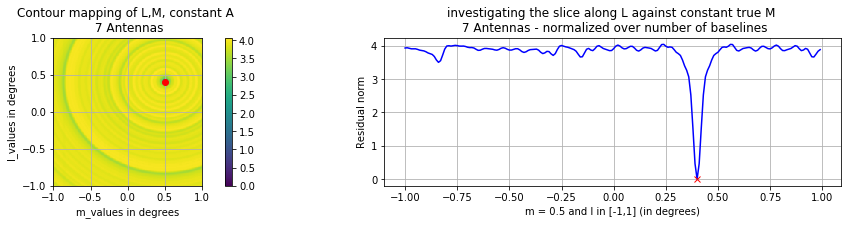

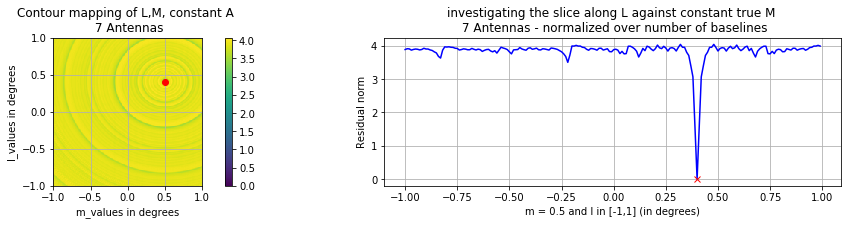

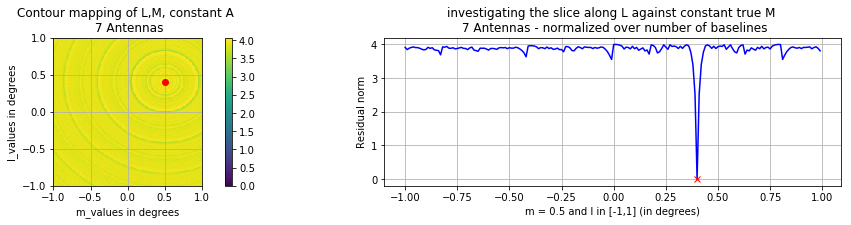

From 0 to 2, plots show an increase in baseline length


In [7]:
#sp= np.array([311,312,313])
plt.figure()
plt.title("7 Antennas with increasing baseline length")
for i in range(len(array_dist_configs)):
    
    plt.subplot(221)
    plt.imshow(np.flipud(RR_const[i][0]), extent=[-1,1,-1,1])
    plt.plot(x_true[1]*180/np.pi,x_true[0]*180/np.pi,'ro',lw=1)
    plt.colorbar()
    plt.grid()
    plt.xlabel("m_values in degrees")
    plt.ylabel("l_values in degrees")
    plt.title("Contour mapping of L,M, constant A \n 7 Antennas")
    
    plt.subplot(222)
    plt.plot(L*180/np.pi,RR_const[i][0][:,RR_const[i][3][0][1]], 'b', x_true[0]*180/np.pi,[0],'rx')
    plt.title("investigating the slice along L against constant true M \n 7 Antennas - normalized over number of baselines")
    plt.grid("on")
    plt.xlabel("m = 0.5 and l in [-1,1] (in degrees)")
    plt.ylabel("Residual norm")
    plt.show()

#w= interact(show_contours, i=(0,len(array_dist_configs)-1))
print("From 0 to 2, plots show an increase in baseline length")

In [12]:
# RR_const = []

# array_dist_configs= np.array([[10,30,60,100,150,210,280],[20,60,120,200,300,420,560],[30,90,180,300,450,630,840]])

# for i in range(len(array_dist_configs)):
#     create_arrayfile(arr= array_dist_configs[i])
#     A_mod,l_mod,m_mod,ut,vt,arrayHxpos= pp.formatSParams(fout,'Field_Profile.txt',td=timeslots)

#     ut= ut[:5,:5]
#     vt= vt[:5,:5]

#     nbl= int(len(ut)*(len(ut)-1)/2)
#     noise = 0.000*np.random.normal(size=(timeslots*2*nbl)) #A noise vector used to manufacture "real" measurements.

#     x_mod = np.radians([l_mod[0],m_mod[0],A_mod[0]])
#     x_start= x_mod.copy()
    
#     d= pf.modfunc(x_true,ut,vt)

#     RR_const.append(get_res())

# print(np.shape(RR_const))

# #sp= np.array([311,312,313])
# plt.figure()
# plt.title("7 Antennas with increasing baseline length")
# for i in range(len(array_dist_configs)):
    
#     plt.subplot(221)
#     plt.imshow(np.flipud(RR_const[i][0]), extent=[-1,1,-1,1])
#     plt.plot(x_true[1]*180/np.pi,x_true[0]*180/np.pi,'ro',lw=1)
#     plt.colorbar()
#     plt.grid()
#     plt.xlabel("m_values in degrees")
#     plt.ylabel("l_values in degrees")
#     plt.title("Contour mapping of L,M, constant A \n 5 Antennas")
    
#     plt.subplot(222)
#     plt.plot(L*180/np.pi,RR_const[i][0][:,RR_const[i][3][0][1]], 'b', x_true[0]*180/np.pi,[0],'rx')
#     plt.title("investigating the slice along L against constant true M \n 5 Antennas - normalized over number of baselines")
#     plt.grid("on")
#     plt.xlabel("m = 0.5 and l in [-1,1] (in degrees)")
#     plt.ylabel("Residual norm")
#     plt.show()

# #w= interact(show_contours, i=(0,len(array_dist_configs)-1))
# print("From 0 to 2, plots show an increase in baseline length")

In [13]:
# RR_const = []

# array_dist_configs= np.array([[10,30,60,100,150,210,280],[20,60,120,200,300,420,560],[30,90,180,300,450,630,840]])

# for i in range(len(array_dist_configs)):
#     create_arrayfile(arr= array_dist_configs[i])
#     A_mod,l_mod,m_mod,ut,vt,arrayHxpos= pp.formatSParams(fout,'Field_Profile.txt',td=timeslots)

#     ut= ut[:3,:3]
#     vt= vt[:3,:3]

#     nbl= int(len(ut)*(len(ut)-1)/2)
#     noise = 0.000*np.random.normal(size=(timeslots*2*nbl)) #A noise vector used to manufacture "real" measurements.

#     x_mod = np.radians([l_mod[0],m_mod[0],A_mod[0]])
#     x_start= x_mod.copy()
    
#     d= pf.modfunc(x_true,ut,vt)

#     RR_const.append(get_res())

# print(np.shape(RR_const))

# #sp= np.array([311,312,313])
# plt.figure()
# plt.title("7 Antennas with increasing baseline length")
# for i in range(len(array_dist_configs)):
    
#     plt.subplot(221)
#     plt.imshow(np.flipud(RR_const[i][0]), extent=[-1,1,-1,1])
#     plt.plot(x_true[1]*180/np.pi,x_true[0]*180/np.pi,'ro',lw=1)
#     plt.colorbar()
#     plt.grid()
#     plt.xlabel("m_values in degrees")
#     plt.ylabel("l_values in degrees")
#     plt.title("Contour mapping of L,M, constant A \n 3 Antennas")
    
#     plt.subplot(222)
#     plt.plot(L*180/np.pi,RR_const[i][0][:,RR_const[i][3][0][1]], 'b', x_true[0]*180/np.pi,[0],'rx')
#     plt.title("investigating the slice along L against constant true M \n 3 Antennas - normalized over number of baselines")
#     plt.grid("on")
#     plt.xlabel("m = 0.5 and l in [-1,1] (in degrees)")
#     plt.ylabel("Residual norm")
#     plt.show()

# #w= interact(show_contours, i=(0,len(array_dist_configs)-1))
# print("From 0 to 2, plots show an increase in baseline length")

In [25]:
Num_of_Ants= 7
x= np.arange(1,Num_of_Ants+1)
y= 3*(np.square(x)+4)
print(y)

[ 15  24  39  60  87 120 159]
